# Bank Marketing Dataset

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## CRISP-DM Framework

CRISP-DM is a standard process for data science projects in the industry. I will be framing my analysis on this datset referring to this methodology.

### Business Understanding

The primary goal of using this dataset is to compare the performance of various classifers for this classification problem.

### Attribute Information:

Input variables:
#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Understanding

In [2]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from time import time

#visualization params
sns.set()
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#read the data
df = pd.read_csv('data/bank-additional-full.csv',sep=';')

#head
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
#check for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no missing values in provided dataset.

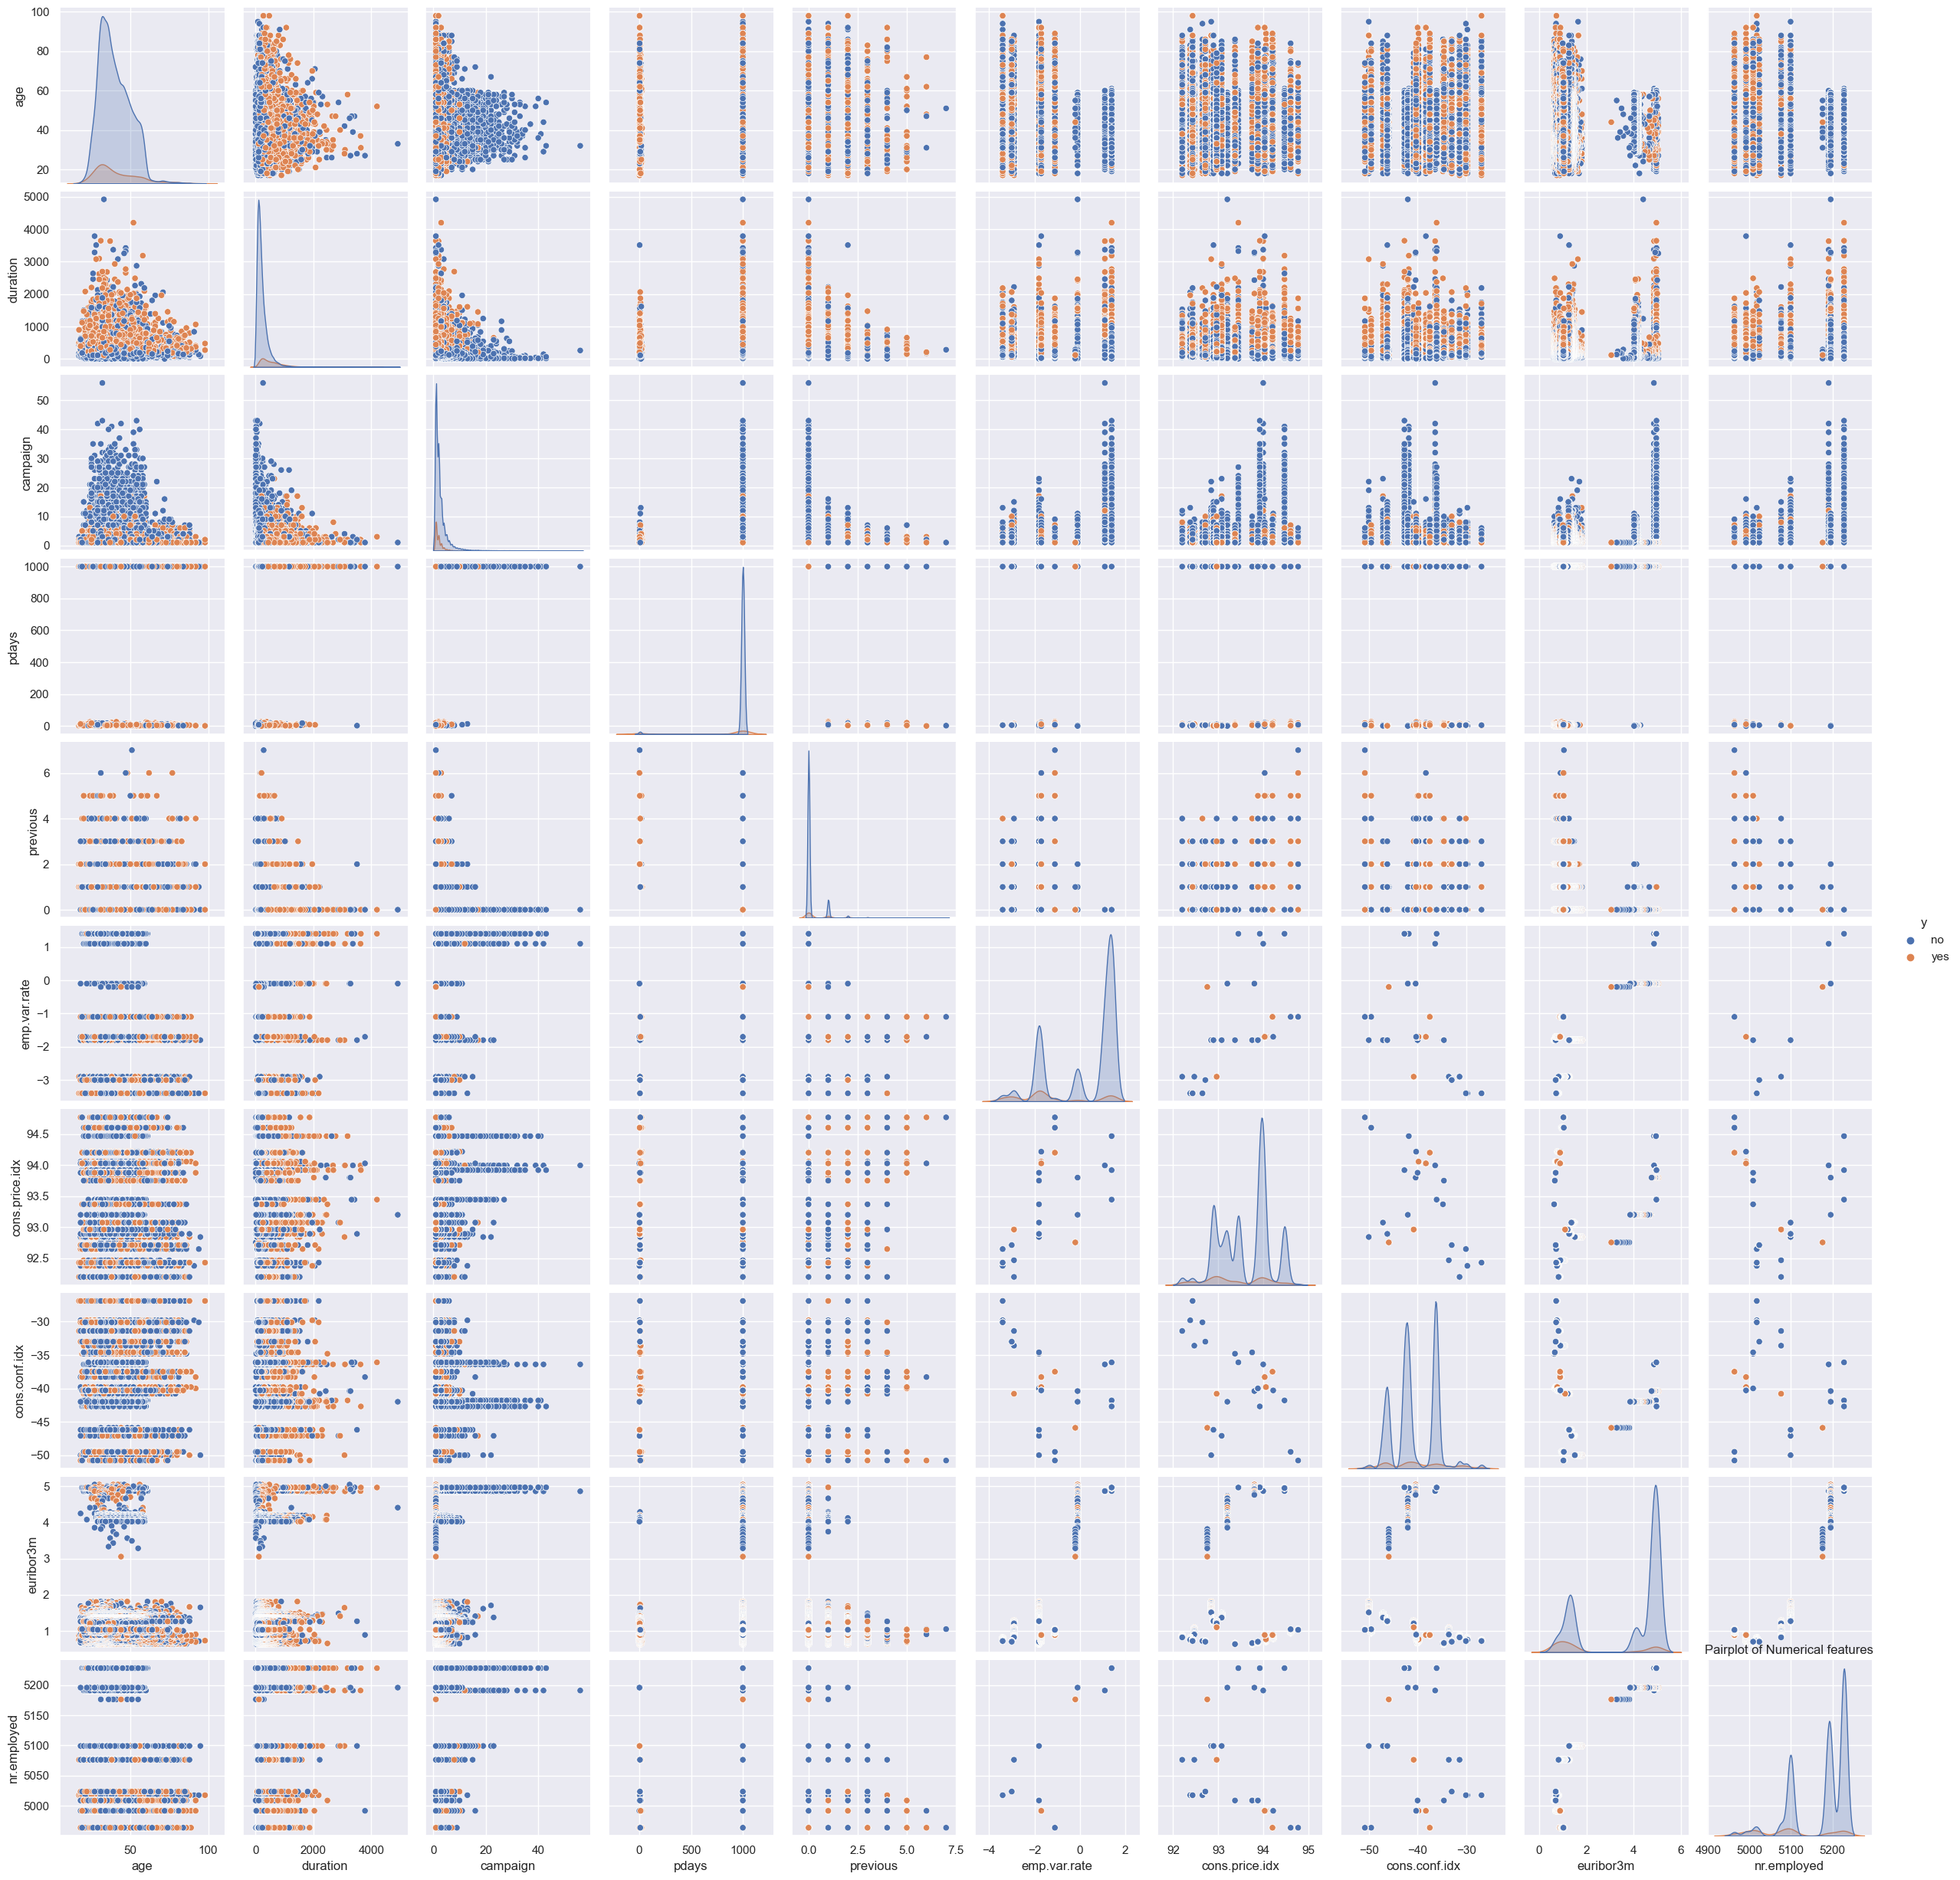

In [6]:
#pairplot of numerical features 

sns.pairplot(df,hue='y')
plt.title('Pairplot of Numerical features');

dtype('int64')

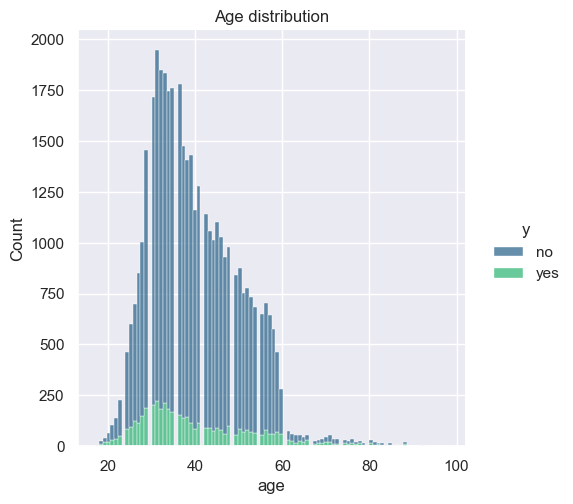

<Figure size 1200x800 with 0 Axes>

In [7]:
#age
sns.displot(data=df,x='age',hue='y',kind='hist',palette='viridis',multiple='stack')
plt.title('Age distribution')
plt.figure(figsize=(12,8))
df.age.dtype

dtype('O')

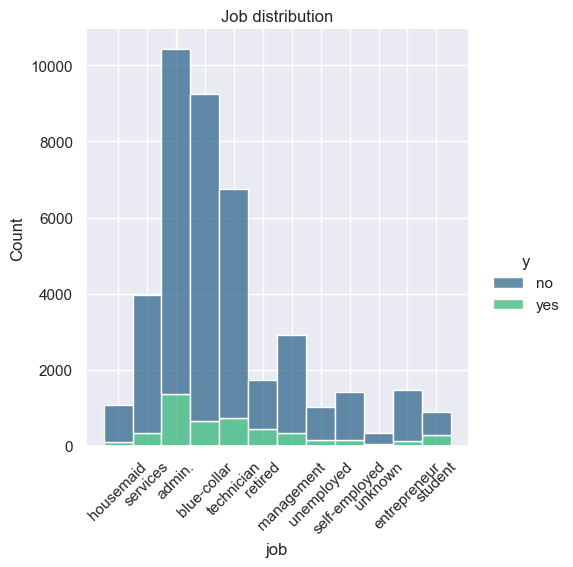

<Figure size 1200x800 with 0 Axes>

In [8]:
#job
sns.displot(data=df,x='job',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Job distribution')
plt.figure(figsize=(12,8))
df.job.dtype

dtype('O')

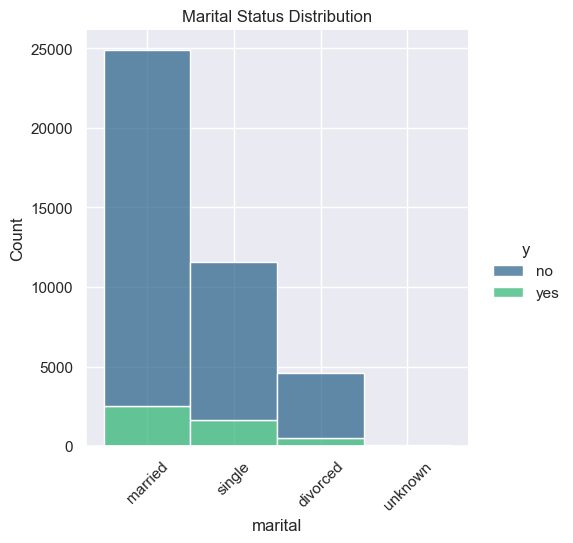

<Figure size 1200x800 with 0 Axes>

In [9]:
#marital
sns.displot(data=df,x='marital',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')
plt.figure(figsize=(12,8))
df.marital.dtype

dtype('O')

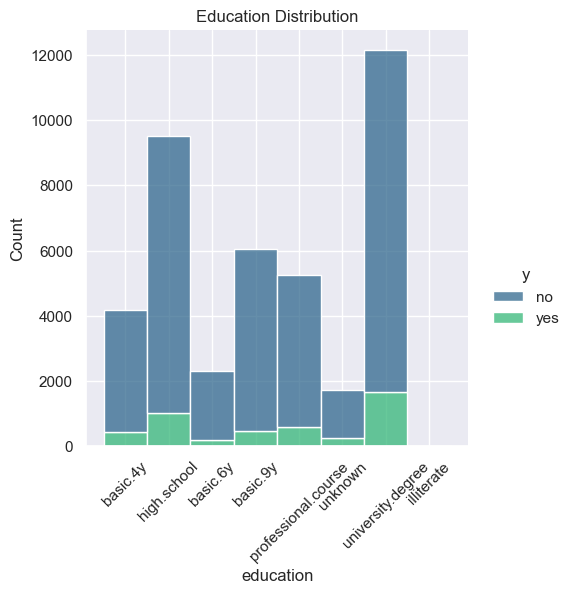

<Figure size 1200x800 with 0 Axes>

In [10]:
#Education
sns.displot(data=df,x='education',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Education Distribution')
plt.figure(figsize=(12,8))
df.education.dtype

dtype('O')

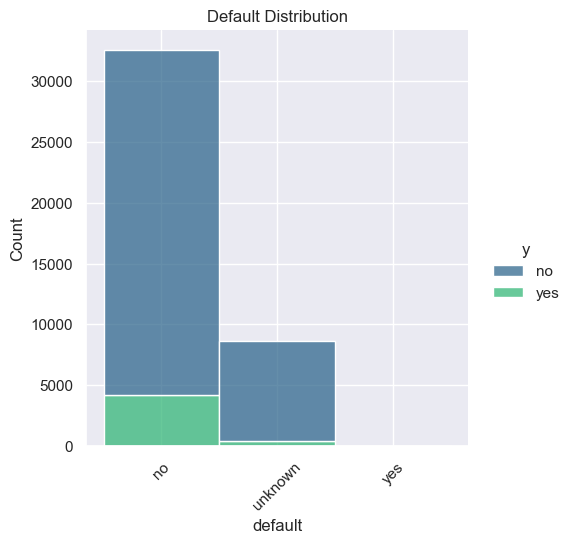

<Figure size 1200x800 with 0 Axes>

In [11]:
#default
sns.displot(data=df,x='default',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Default Distribution')
plt.figure(figsize=(12,8))
df.default.dtype

dtype('O')

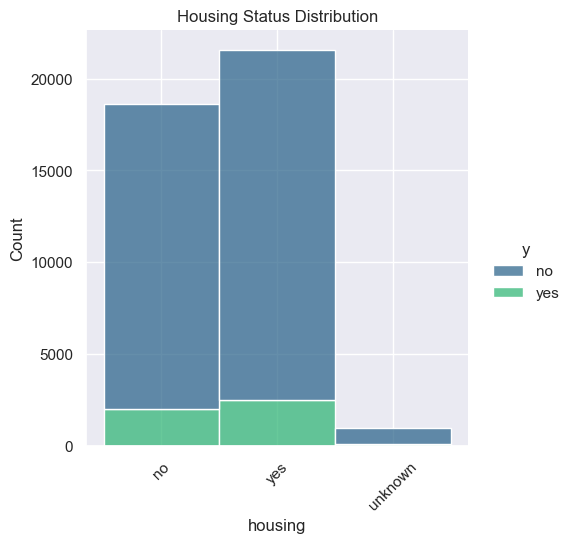

<Figure size 1200x800 with 0 Axes>

In [12]:
#housing
sns.displot(data=df,x='housing',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Housing Status Distribution')
plt.figure(figsize=(12,8))
df.housing.dtype

dtype('O')

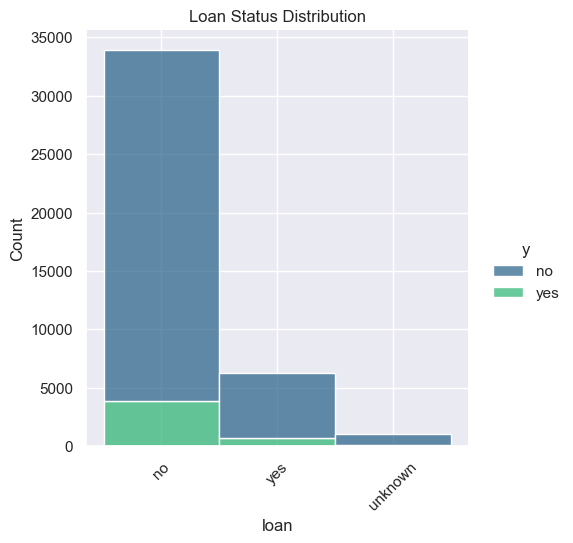

<Figure size 1200x800 with 0 Axes>

In [13]:
#loan
sns.displot(data=df,x='loan',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Loan Status Distribution')
plt.figure(figsize=(12,8))
df.loan.dtype

dtype('O')

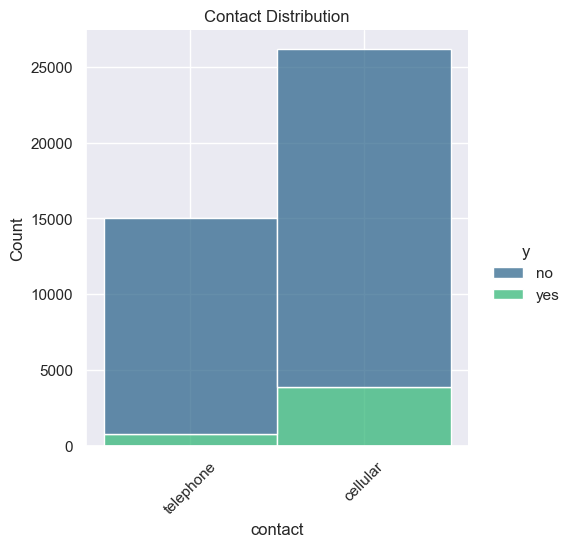

<Figure size 1200x800 with 0 Axes>

In [14]:
#contact
sns.displot(data=df,x='contact',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Contact Distribution')
plt.figure(figsize=(12,8))
df.contact.dtype

dtype('O')

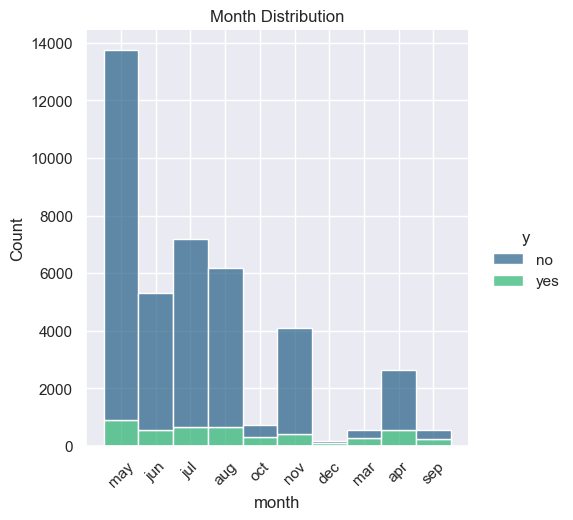

<Figure size 1200x800 with 0 Axes>

In [15]:
#month
sns.displot(data=df,x='month',kind='hist',palette='viridis',hue='y',multiple='stack')
plt.xticks(rotation=45)
plt.title('Month Distribution')
plt.figure(figsize=(12,8))
df.month.dtype

dtype('O')

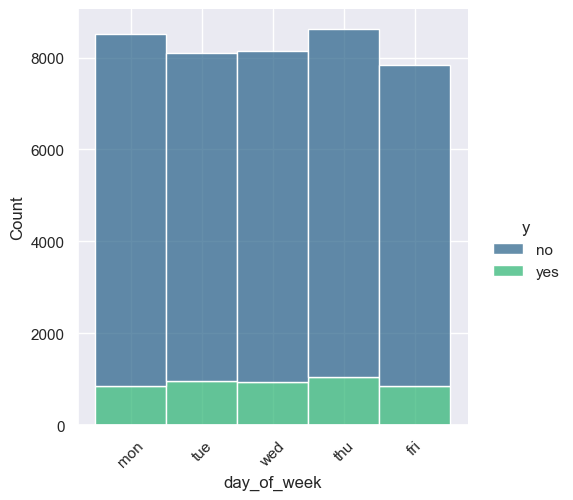

<Figure size 1200x800 with 0 Axes>

In [16]:
#day of the week
sns.displot(df,x='day_of_week',kind='hist',hue='y',multiple='stack',palette='viridis')
plt.xticks(rotation=45)
plt.figure(figsize=(12,8))
df['day_of_week'].dtype

dtype('int64')

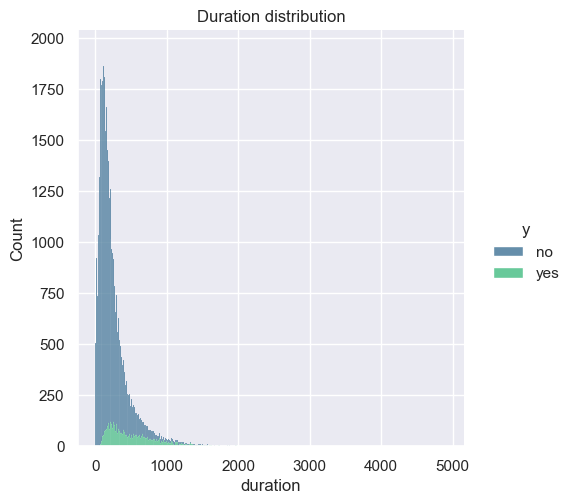

<Figure size 1200x800 with 0 Axes>

In [17]:
#duration
sns.displot(data=df,x='duration',hue='y',kind='hist',palette='viridis',multiple='stack')
plt.title('Duration distribution')
plt.figure(figsize=(12,8))
df.duration.dtype

dtype('float64')

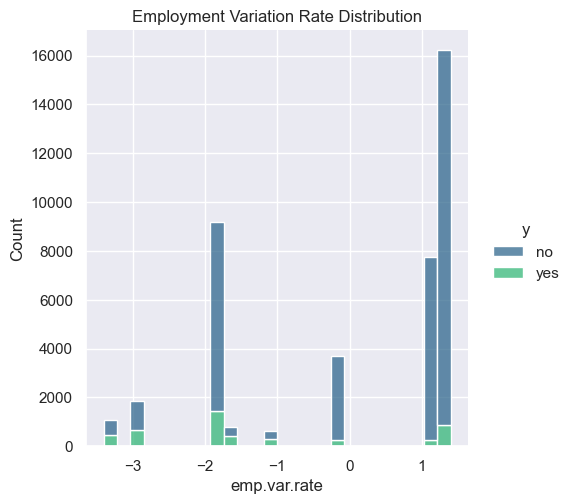

<Figure size 1200x800 with 0 Axes>

In [18]:
#employment variation rate

sns.displot(data=df,x='emp.var.rate',hue='y',kind='hist',palette='viridis',multiple='stack')
plt.title('Employment Variation Rate Distribution')
plt.figure(figsize=(12,8))
df['emp.var.rate'].dtype

dtype('float64')

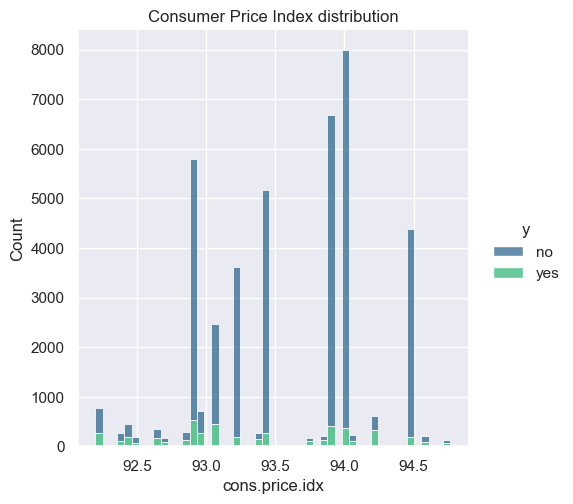

<Figure size 1200x800 with 0 Axes>

In [19]:
#cons.price.idx
sns.displot(data=df,x='cons.price.idx',hue='y',kind='hist',palette='viridis',multiple='stack')
plt.title('Consumer Price Index distribution')
plt.figure(figsize=(12,8))
df['cons.price.idx'].dtype

dtype('float64')

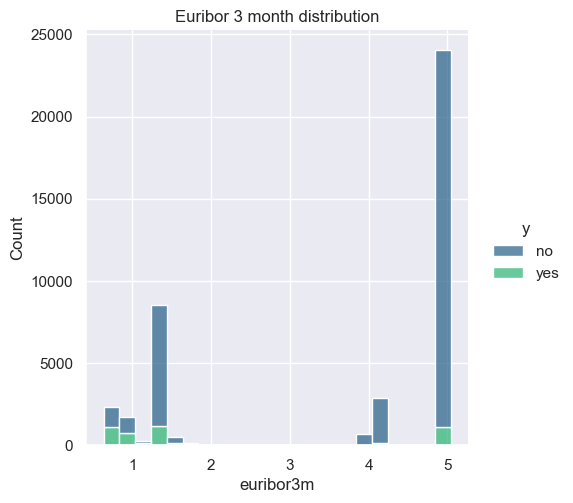

<Figure size 1200x800 with 0 Axes>

In [20]:
#euribor3m
sns.displot(data=df,x='euribor3m',hue='y',kind='hist',palette='viridis',multiple='stack')
plt.title('Euribor 3 month distribution')
plt.figure(figsize=(12,8))
df.euribor3m.dtype

dtype('float64')

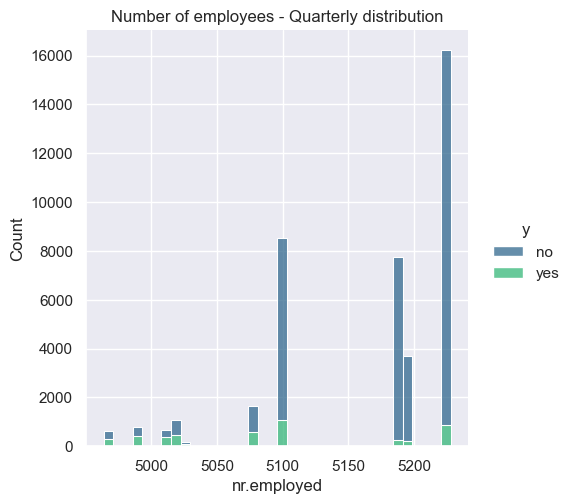

<Figure size 1200x800 with 0 Axes>

In [21]:
#number of employees - quarterly indicator
sns.displot(data=df,x='nr.employed',hue='y',kind='hist',palette='viridis',multiple='stack')
plt.title('Number of employees - Quarterly distribution')
plt.figure(figsize=(12,8))
df['nr.employed'].dtype

## Modeling

Since this is classification problem, I will being using various classification algorithms provided out of box using Sci-kit learn module.

In [22]:
#imports

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector,ColumnTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [23]:
#Test Train Split
X = df.drop(['campaign','pdays','previous','poutcome','y'],axis=1)
y = df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(41188, 16)
(41188,)


## Preprocessing

General preprocessing steps that are common for all the classifiers. The categorical features are one hot encoded and the numerical features are scaled using a StandardScaler algorithm.

In [24]:
#Pre-processing

#selecting the numerical columns
num_cols = make_column_selector(dtype_include=('int64','float64'))

#Preprocessing
pre = ColumnTransformer([
    ('scaler',StandardScaler(),num_cols)
],remainder = OneHotEncoder())

All the classifiers are built using a pipeline, which takes the input from the column transformer which contains our pre-processing steps.

## Logistic Regression

In [25]:
#Logistic Regression pipeline
pipe_lr = Pipeline([
    ('pre',pre),
    ('lr',LogisticRegression(max_iter=1000,random_state=42))
])
pipe_lr

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder=OneHotEncoder(),
                                   transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x168515e40>)])),
                ('lr', LogisticRegression(max_iter=1000, random_state=42))])

Train Accuracy: 90.5554
Test Accuracy: 90.6531
Test F1 score: 48.0432
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7303
         yes       0.65      0.38      0.48       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



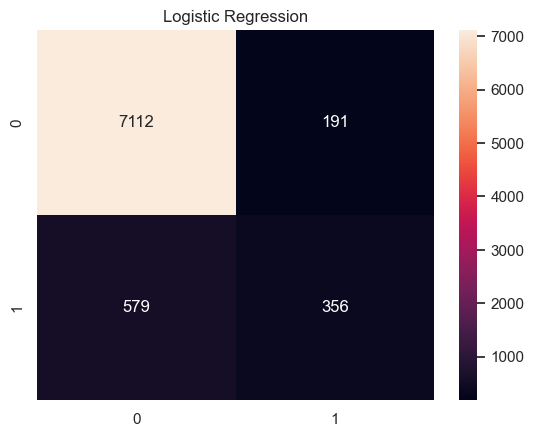

In [26]:
#Model Training
pipe_lr.fit(X_train,y_train)

#Model prediction
y_pred = pipe_lr.predict(X_test)
y_pred_train = pipe_lr.predict(X_train)

#Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Classification Report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

Fitting 5 folds for each of 15 candidates, totalling 75 fits
GridSearchCV took 54.03 seconds for 15 candidate parameter settings.
The best params are
 {'lr__C': 0.01, 'lr__solver': 'sag'}
Train Accuracy: 90.5888
Test Accuracy: 90.6531
Test F1 score: 46.3788
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7303
         yes       0.66      0.36      0.46       935

    accuracy                           0.91      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.91      0.89      8238



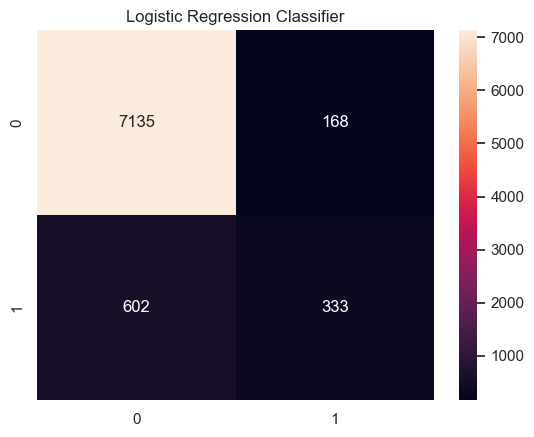

In [27]:
#GridSearch for Optimal Hyperparameters

param_grid = {
    'lr__C':(0.01,0.1,1),
    'lr__solver':('newton-cg', 'lbfgs','liblinear','sag','saga'),
#    'lr__class_weight':(None,'balanced')
}

grid_lr = GridSearchCV(pipe_lr,param_grid,scoring='accuracy',verbose=1)
start = time()
grid_lr.fit(X_train,y_train)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_lr.cv_results_["params"]))
)

#best paramater available in the grid
print('The best params are\n',grid_lr.best_params_)

#Refit Model Predictions
y_pred = grid_lr.predict(X_test)
y_pred_train = grid_lr.predict(X_train)

#Refit Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Refit model Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('Logistic Regression Classifier')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

In [28]:
#Appending the results to a results

results_lr = {
    'Model':['Logistic Regression'],
    'Train Score':[round(train_score*100,4)],
    'Test Score':[round(test_acc_score*100,4)],
    'Refit Time':[round(grid_lr.refit_time_,4)]
}
results = pd.DataFrame.from_dict(results_lr)
results

,Model,Train Score,Test Score,Refit Time
0,Logistic Regression,90.5888,90.6531,2.2281


## Why Refit Time?
Refit time is the amount of the time taken to fit the model using the best parameters found throught the grid search. This helps us understand how long it would have taken to train the model. This metric can be used to compare the training time amongst various models.

## K-Nearest Neighbors

Train Accuracy: 92.7344
Test Accuracy: 89.8034
Test F1 score: 49.1525
              precision    recall  f1-score   support

          no       0.93      0.96      0.94      7303
         yes       0.57      0.43      0.49       935

    accuracy                           0.90      8238
   macro avg       0.75      0.70      0.72      8238
weighted avg       0.89      0.90      0.89      8238



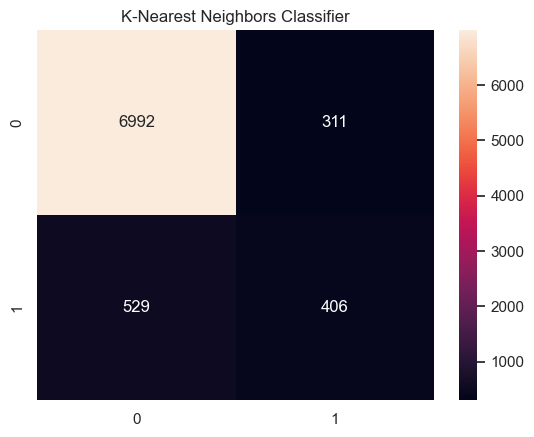

In [29]:
#KNN pipeline
pipe_knn = Pipeline([
    ('pre',pre),
    ('knn',KNeighborsClassifier())
])

#Model Training and predictions
pipe_knn.fit(X_train,y_train)
y_pred = pipe_knn.predict(X_test)
y_pred_train = pipe_knn.predict(X_train)

#Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('K-Nearest Neighbors Classifier')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

Fitting 5 folds for each of 3 candidates, totalling 15 fits
GridSearchCV took 80.70 seconds for 3 candidate parameter settings.
The best params are
 {'knn__n_neighbors': 4}
Train Accuracy: 92.6191
Test Accuracy: 89.4877
Test F1 score: 37.4277
              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7303
         yes       0.58      0.28      0.37       935

    accuracy                           0.89      8238
   macro avg       0.75      0.63      0.66      8238
weighted avg       0.88      0.89      0.88      8238



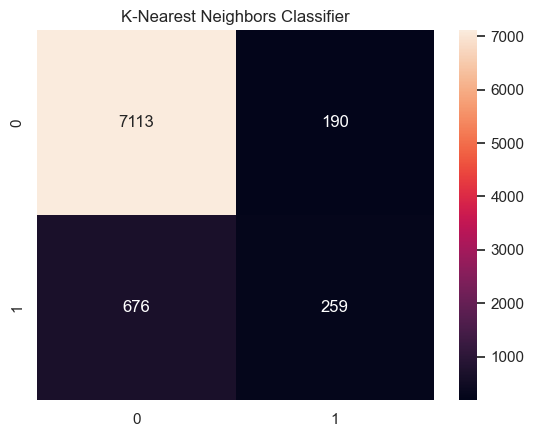

In [30]:
#Gridsearch and refitting

param_grid = {
    'knn__n_neighbors': range(2,5,1),
#    'knn__weights':('uniform','distance'),
#    'knn__algorithm':('auto','ball_tree','kd_tree','brute')
}

grid_knn = GridSearchCV(pipe_knn,param_grid,scoring='accuracy',verbose=1)
start = time()
grid_knn.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."% (time() - start, len(grid_knn.cv_results_["params"])))
#best params
print('The best params are\n',grid_knn.best_params_)

#Refit Model Predictions
y_pred = grid_knn.predict(X_test)
y_pred_train = grid_knn.predict(X_train)

#Refit Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Refit model Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('K-Nearest Neighbors Classifier')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

In [31]:
#appending the results Dataframe

results_knn = {
    'Model':['K-Nearest Neighbors'],
    'Train Score':[round(train_score*100,4)],
    'Test Score':[round(test_acc_score*100,4)],
    'Refit Time':[round(grid_knn.refit_time_,4)]
}
results_knn = pd.DataFrame.from_dict(results_knn)
results = results.append(results_knn)

results

,Model,Train Score,Test Score,Refit Time
0,Logistic Regression,90.5888,90.6531,2.2281
0,K-Nearest Neighbors,92.6191,89.4877,0.0682


## Decision Tree Classifier

Train Accuracy: 100.0
Test Accuracy: 88.5773
Test F1 score: 51.1676
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.50      0.53      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



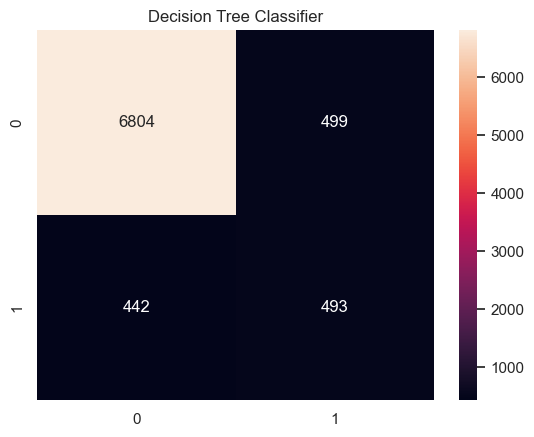

In [32]:
#DEcision Tree pipeline
pipe_dt = Pipeline([
    ('pre',pre),
    ('dt',DecisionTreeClassifier())
])

#Model Training and predictions
pipe_dt.fit(X_train,y_train)
y_pred = pipe_dt.predict(X_test)
y_pred_train = pipe_dt.predict(X_train)

#Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

Fitting 5 folds for each of 78 candidates, totalling 390 fits
GridSearchCV took 48.39 seconds for 78 candidate parameter settings.
The best params are
 {'dt__criterion': 'entropy', 'dt__max_depth': 6, 'dt__splitter': 'best'}
Train Accuracy: 91.5812
Test Accuracy: 91.1508
Test F1 score: 57.5422
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7303
         yes       0.63      0.53      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



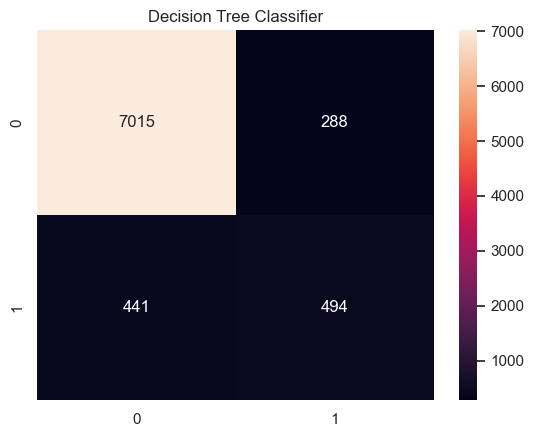

In [33]:
#Gridsearch and refitting

param_grid = {
    'dt__criterion':('gini','entropy','logloss'),
    'dt__splitter':('best','random'),
#    'dt__class_weight':(None,'balanced'),
    'dt__max_depth':range(2,15,1)
    
}

grid_dt = GridSearchCV(pipe_dt,param_grid,scoring='accuracy',verbose=1)
start = time()
grid_dt.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."% (time() - start, len(grid_dt.cv_results_["params"])))
#best params
print('The best params are\n',grid_dt.best_params_)

#Refit Model Predictions
y_pred = grid_dt.predict(X_test)
y_pred_train = grid_dt.predict(X_train)

#Refit Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Refit model Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

In [34]:
#appending the results Dataframe

results_dt = {
    'Model':['Decision Tree Classifier'],
    'Train Score':[round(train_score*100,4)],
    'Test Score':[round(test_acc_score*100,4)],
    'Refit Time':[round(grid_dt.refit_time_,4)]
}
results_dt = pd.DataFrame.from_dict(results_dt)
results = results.append(results_dt)

results

,Model,Train Score,Test Score,Refit Time
0,Logistic Regression,90.5888,90.6531,2.2281
0,K-Nearest Neighbors,92.6191,89.4877,0.0682
0,Decision Tree Classifier,91.5812,91.1508,0.1405


## SVC 

Train Accuracy: 91.8665
Test Accuracy: 90.8837
Test F1 score: 49.6311
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



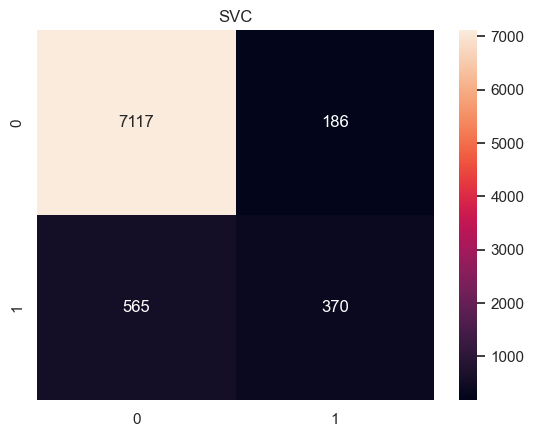

In [35]:
#KNN pipeline
pipe_svc = Pipeline([
    ('pre',pre),
    ('svc',SVC(random_state=42))
])

#Model Training and predictions
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
y_pred_train = pipe_svc.predict(X_train)

#Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('SVC')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");

Fitting 5 folds for each of 10 candidates, totalling 50 fits
GridSearchCV took 812.80 seconds for 10 candidate parameter settings.
The best params are
 {'svc__C': 1000, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Train Accuracy: 91.1411
Test Accuracy: 90.7866
Test F1 score: 46.3604
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7303
         yes       0.68      0.35      0.46       935

    accuracy                           0.91      8238
   macro avg       0.80      0.66      0.71      8238
weighted avg       0.89      0.91      0.89      8238



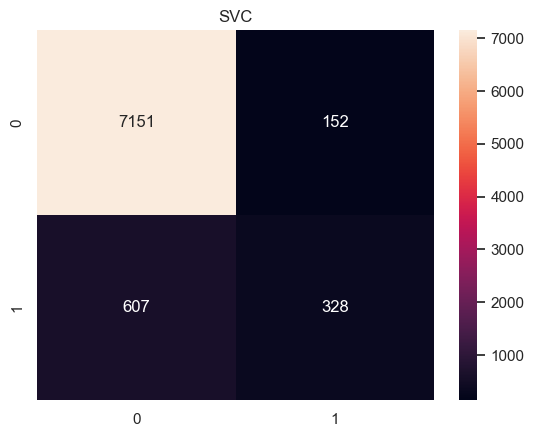

In [36]:
#Gridsearch and refitting

tuned_params = [
    {"svc__kernel": ["rbf"], "svc__gamma": [1e-3, 1e-4], "svc__C": [1, 10, 100, 1000]},
    {"svc__kernel": ["linear"], "svc__C": [1, 10]},
]

grid_svc = GridSearchCV(pipe_svc,tuned_params,scoring='accuracy',verbose=1)
start = time()
grid_svc.fit(X_train,y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."% (time() - start, len(grid_svc.cv_results_["params"])))
#best params
print('The best params are\n',grid_svc.best_params_)

#Refit Model Predictions
y_pred = grid_svc.predict(X_test)
y_pred_train = grid_svc.predict(X_train)

#Refit Model Evaluation
train_score = accuracy_score(y_train,y_pred_train)
print('Train Accuracy:',round(train_score*100,4))
test_acc_score = accuracy_score(y_test,y_pred)
print('Test Accuracy:',round(test_acc_score*100,4))
test_f1_score = f1_score(y_test,y_pred,pos_label='yes',average='binary')
print('Test F1 score:',round(test_f1_score*100,4))

#Refit model Classification report
print(classification_report(y_test,y_pred))

#Confusion Matrix Heatmap
plt.title('SVC')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d");


In [37]:
#appending the results Dataframe

results_svc = {
    'Model':['SVC'],
    'Train Score':[round(train_score*100,4)],
    'Test Score':[round(test_acc_score*100,4)],
    'Refit Time':[round(grid_svc.refit_time_,4)]
}
results_svc = pd.DataFrame.from_dict(results_svc)
results = results.append(results_svc)
results.reset_index(drop=True)

,Model,Train Score,Test Score,Refit Time
0,Logistic Regression,90.5888,90.6531,2.2281
1,K-Nearest Neighbors,92.6191,89.4877,0.0682
2,Decision Tree Classifier,91.5812,91.1508,0.1405
3,SVC,91.1411,90.7866,30.7087


## Final Results

In [38]:
results

,Model,Train Score,Test Score,Refit Time
0,Logistic Regression,90.5888,90.6531,2.2281
0,K-Nearest Neighbors,92.6191,89.4877,0.0682
0,Decision Tree Classifier,91.5812,91.1508,0.1405
0,SVC,91.1411,90.7866,30.7087


## Inferences
1. K-Nearest Neighbors classifier took the least amount of time to train but the catch is that it also produced the least accuracy score amongst the other classifiers.
2. Decision Tree Classifier produced the highest accuracy predictions while also takin the least amount of time to train losing only to KNN classifier. This can be due to high amount categorical features in the dataset.
3. Support Vector Classifier(SVC) performed decently in predicting the outcome but had a significantly worse training time.  

## Next Steps & Recommendations
- The focus of this project has been to compare and contrast various classifers, minimal amount of preprocessing has been done to the data before the feeding it into the algorithms. Further cleaning the data by identifying the important features and trying various encoding methods for categorical feartures.
- The primary metric for evaluation used was "Accuracy", we can easily change this "Precision" or "Recall" based on the business requirements and redo the experiment.
- To avoid extremely long runtimes, I have commented out some parameters in the GridSearchCV params grid. The result may vary when more rigorous grid search is peformed.